In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
whale_df = pd.read_excel('Empires___Puzzles_Whale.xlsx')
no_paying_df = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx')
whale_df_time = pd.read_excel('Empires___Puzzles_Whale.xlsx', sheet_name = 'Videolength')
no_paying_df_time = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx', sheet_name = 'Videolength')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
whale_df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,00:00:00,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,00:00:12,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,00:00:15,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,00:00:25,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,00:00:26,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
no_paying_df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
whale_df_time.head()

,#,Whale,Time,Day,Session
0,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,1,1
1,1.2,https://youtu.be/SSuTcnH03d4?list=PLTjhk5BwsiV...,00:08:03,1,1
2,1.3,https://youtu.be/EL26rnKiEBI?list=PLTjhk5BwsiV...,00:09:33,1,1
3,2.1,https://youtu.be/TyJyBWg0z7w?list=PLTjhk5BwsiV...,00:22:46,1,2
4,2.2,https://youtu.be/gKEElPrlPIU?list=PLTjhk5BwsiV...,00:58:23,1,2


In [ ]:
no_paying_df_time.head()

,#,Non-Paying,Time,Day,Session
0,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,1,1
1,1.2,https://youtu.be/Q_7InYWacNM?list=PLTjhk5BwsiV...,00:12:32,1,1
2,2.0,https://youtu.be/CU5OxcG65G4?list=PLTjhk5BwsiV...,01:35:09,1,2
3,3.0,https://youtu.be/aq3oTnkOJXk?list=PLTjhk5BwsiV...,00:49:36,2,3
4,4.0,https://youtu.be/Wl3JEEN7Cio?list=PLTjhk5BwsiV...,01:17:17,2,4


#1.Познакомимся с данными, поправим недочеты

##Поищем дубликаты

In [ ]:
duplicateRows = whale_df[whale_df.duplicated()]

In [ ]:
duplicateRows.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
469,2020-10-27,1,2,2.1,https://youtu.be/TyJyBWg0z7w?list=PLTjhk5BwsiV...,00:22:46,00:00:17,00:00:17,2,3,...,NaN,Farm,3,NaN,NaN,NaN,NaN,0,0,123
973,2020-10-27,1,3,3.0,https://youtu.be/6Gl4V9lhvBs?list=PLTjhk5BwsiV...,00:59:54,00:13:48,00:13:48,6,4,...,NaN,Mine,4,NaN,NaN,NaN,NaN,0,0,722
1189,2020-10-28,2,4,4.0,https://youtu.be/8r1azwNcJZc?list=PLTjhk5BwsiV...,01:01:42,00:00:11,00:00:11,6,4,...,1681.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,871
2245,2020-10-29,3,8,8.0,https://youtu.be/BAwgG0sxLCI?list=PLTjhk5BwsiV...,00:39:33,00:00:22,00:00:22,9,6,...,1817.0,NaN,NaN,NaN,NaN,Defeat,NaN,0,0,4962
2393,2020-10-29,3,9,9.1,https://youtu.be/4Gu7MKAj_fA?list=PLTjhk5BwsiV...,00:59:39,00:00:10,00:00:10,9,6,...,NaN,Mine,6,NaN,NaN,NaN,NaN,0,0,4973


In [ ]:
duplicateRows_1 = no_paying_df[no_paying_df.duplicated()]

In [ ]:
duplicateRows_1.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
1128,2020-10-15,2,4,4.0,https://youtu.be/Wl3JEEN7Cio?list=PLTjhk5BwsiV...,01:17:17,00:00:43,00:00:43,5.0,3,...,NaN,NaN,NaN,NaN,NaN,Defeat,NaN,0,0,62
1611,2020-10-16,3,6,6.0,https://youtu.be/_lATyEoTUqA?list=PLTjhk5BwsiV...,00:43:41,00:00:22,00:00:22,6.0,4,...,NaN,NaN,NaN,NaN,NaN,Victory,NaN,0,0,94
1612,2020-10-16,3,6,6.0,https://youtu.be/_lATyEoTUqA?list=PLTjhk5BwsiV...,00:43:41,00:00:22,00:00:22,6.0,4,...,NaN,NaN,NaN,NaN,NaN,Defeat,NaN,0,0,94
1613,2020-10-16,3,6,6.0,https://youtu.be/_lATyEoTUqA?list=PLTjhk5BwsiV...,00:43:41,00:00:22,00:00:22,6.0,4,...,NaN,NaN,NaN,NaN,NaN,Victory,NaN,0,0,94
1614,2020-10-16,3,6,6.0,https://youtu.be/_lATyEoTUqA?list=PLTjhk5BwsiV...,00:43:41,00:00:22,00:00:22,6.0,4,...,NaN,NaN,NaN,NaN,NaN,Defeat,NaN,0,0,94


In [ ]:
duplicateRows_2 = whale_df_time[whale_df_time.duplicated()]

In [ ]:
duplicateRows_2

,#,Whale,Time,Day,Session


In [ ]:
duplicateRows_3 = no_paying_df_time[no_paying_df_time.duplicated()]

In [ ]:
duplicateRows_3

,#,Non-Paying,Time,Day,Session


## Удалим дупликаты

In [ ]:
whale_df = whale_df.drop_duplicates()
no_paying_df = no_paying_df.drop_duplicates()

## Поищем ошибки в данных

In [ ]:
whale_df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,00:00:00,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,00:00:12,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,00:00:15,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,00:00:25,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,00:00:26,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10211 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10211 non-null  datetime64[ns]
 1   Day               10211 non-null  int64         
 2   Session           10211 non-null  int64         
 3   Video #           10211 non-null  float64       
 4   Videolink         10211 non-null  object        
 5   Videolength       10211 non-null  object        
 6   Timestamp         10211 non-null  object        
 7   Timelink          10211 non-null  object        
 8   Player Level      10211 non-null  int64         
 9   Stronghold Level  10211 non-null  int64         
 10  Tag               10209 non-null  object        
 11  Action            10209 non-null  object        
 12  Info              2404 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2         15 n

In [ ]:
# почему некоторые строки имеют тип object?
whale_df['Videolength'].unique()

array([datetime.time(0, 32, 35), datetime.time(0, 8, 3),
       datetime.time(0, 9, 33), datetime.time(0, 22, 46),
       datetime.time(0, 58, 23), datetime.time(0, 59, 54),
       datetime.time(1, 1, 42), datetime.time(0, 20, 44),
       datetime.time(0, 56, 30), datetime.time(1, 3, 52),
       datetime.time(0, 5, 34), datetime.time(0, 39, 33),
       datetime.time(0, 59, 39), datetime.time(0, 1, 14),
       datetime.time(1, 3, 53), datetime.time(0, 28, 56),
       datetime.time(0, 44, 44), datetime.time(0, 51, 15),
       datetime.time(0, 32, 8), datetime.time(0, 55, 36),
       datetime.time(0, 3, 33), datetime.time(0, 43, 28),
       datetime.time(0, 58, 14), datetime.time(1, 2, 9),
       datetime.time(0, 48, 32), datetime.time(0, 40, 40),
       datetime.time(0, 56, 52), datetime.time(0, 29, 35),
       datetime.time(0, 24, 35), datetime.time(0, 25, 51),
       datetime.time(0, 56, 32), datetime.time(0, 51, 58),
       datetime.time(0, 32, 39), datetime.time(1, 0, 18),
       dat

In [ ]:
whale_df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        52 non-null     float64
 1   Whale    52 non-null     object 
 2   Time     52 non-null     object 
 3   Day      52 non-null     int64  
 4   Session  52 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ KB


Поменяем столбец 'Videolength' на что-то, что позволит считать время

In [ ]:
whale_df['Videolength'] = pd.to_datetime(whale_df['Videolength'], format='%H:%M:%S').dt.time

In [ ]:
whale_df['Videolength_seconds'] = whale_df['Videolength'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [ ]:
whale_df['Videolength_seconds'].unique()

array([1955,  483,  573, 1366, 3503, 3594, 3702, 1244, 3390, 3832,  334,
       2373, 3579,   74, 3833, 1736, 2684, 3075, 1928, 3336,  213, 2608,
       3494, 3729, 2912, 2440, 3412, 1775, 1475, 1551, 3392, 3118, 1959,
       3618,  988, 3493, 2289,  273, 3522,  820, 2623, 3677,  204, 1076,
        830, 3379, 3260, 3355, 2782, 2456, 2224])

In [ ]:
whale_df['Videolength_minute'] = whale_df['Videolength_seconds'] / 60

In [ ]:
no_paying_df['Videolength'] = pd.to_datetime(no_paying_df['Videolength'], format='%H:%M:%S').dt.time

In [ ]:
no_paying_df['Videolength_seconds'] = no_paying_df['Videolength'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [ ]:
no_paying_df['Videolength_seconds'].unique()

array([3737,  752, 5709, 2976, 4637, 1605, 2621, 3175, 1896, 2916, 3240,
       3732, 2828,   41, 1996, 2596, 2379, 2329, 1664, 2386, 3383, 4837,
       3474, 2201,   30, 2744, 2579, 3054, 1560, 2524, 2151, 4544, 3571,
       2158, 1653, 3853, 2317, 3052, 4646, 5720, 1982, 3485, 2345, 2255])

In [ ]:
no_paying_df['Videolength_minute'] = no_paying_df['Videolength_seconds'] / 60

In [ ]:
whale_df_time['Time'] = pd.to_datetime(whale_df_time['Time'], format='%H:%M:%S').dt.time

In [ ]:
whale_df_time['Time_seconds'] = whale_df_time['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [ ]:
whale_df_time['Time_seconds'].unique()

array([1955,  483,  573, 1366, 3503, 3594, 3702, 1244, 3390, 3832,  334,
       2373, 3579,   74, 3833, 1736, 2684, 3075, 1928, 3336,  213, 2608,
       3494, 3729, 2912, 2440, 3412, 1775, 1475, 1551, 3392, 3118, 1959,
       3618,  988, 3493, 2289,  273, 3522,  820, 2623, 3677,  204, 1076,
        830, 3379, 3260, 3355, 2782, 2456, 2224])

In [ ]:
whale_df_time['Time_minute'] = whale_df_time['Time_seconds'] / 60

In [ ]:
no_paying_df_time['Time'] = pd.to_datetime(no_paying_df_time['Time'], format='%H:%M:%S').dt.time

In [ ]:
no_paying_df_time['Time_seconds'] = no_paying_df_time['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [ ]:
no_paying_df_time['Time_seconds'].unique()

array([3737,  752, 5709, 2976, 4637, 1605, 2621, 3175, 1896, 2916, 3240,
       3732, 2828,   41, 1996, 2596, 2379, 2329, 1664, 2386, 3383, 4837,
       3474, 2201,   30, 2744, 2579, 3054, 1560, 2524, 2151, 4544, 3571,
       2158, 1653, 3853, 2317, 3052, 4646, 5720, 1982, 3485, 2345, 2255])

In [ ]:
no_paying_df_time['Time_minute'] = no_paying_df_time['Time_seconds'] / 60

##Теперь избавимся от слобцов данных, которые кажутся излишними, оставим те, которые могут пригодиться

In [ ]:
whale_df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,00:00:00,1,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1955,32.583333
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,00:00:12,1,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1955,32.583333
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,00:00:15,1,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1955,32.583333
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,00:00:25,1,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1955,32.583333
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,00:00:26,1,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1955,32.583333


In [ ]:
whale_df = whale_df.iloc[:,[0,1,2,8,9,10,11,12,18,25,26,27,28,29,30,31]]

In [ ]:
whale_df.head()

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
0,2020-10-27,1,1,1,1,Idle,Start,Loading,NaN,NaN,NaN,0,0,0,1955,32.583333
1,2020-10-27,1,1,1,1,Player,Pop-Up,Accept the Terms of Service,1.0,NaN,NaN,0,0,0,1955,32.583333
2,2020-10-27,1,1,1,1,Campaign,Dialog Start,"начало игры, начало истории",1.0,NaN,NaN,0,0,0,1955,32.583333
3,2020-10-27,1,1,1,1,Campaign,Start Battle,NaN,1.0,NaN,NaN,0,0,0,1955,32.583333
4,2020-10-27,1,1,1,1,Tutorial,Advice about moves,NaN,1.0,NaN,NaN,0,0,0,1955,32.583333


In [ ]:
no_paying_df = no_paying_df.iloc[:,[0,1,2,8,9,10,11,12,19,28,29,30,31,32,33,34]]

In [ ]:
no_paying_df.head()

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
0,2020-10-14,1,1,1.0,1,Idle,Start,NaN,NaN,NaN,NaN,0,0,0,3737,62.283333
1,2020-10-14,1,1,1.0,1,Player,Privacy Policy,NaN,NaN,NaN,NaN,0,0,0,3737,62.283333
2,2020-10-14,1,1,1.0,1,Campaign,Dialog Start,NaN,NaN,NaN,NaN,0,0,0,3737,62.283333
3,2020-10-14,1,1,1.0,1,Campaign,Start Battle,NaN,1,NaN,NaN,0,0,0,3737,62.283333
4,2020-10-14,1,1,1.0,1,Tutorial,Advice about moves,NaN,1,NaN,NaN,0,0,0,3737,62.283333


In [ ]:
whale_df_time.head()

,#,Whale,Time,Day,Session,Time_seconds,Time_minute
0,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,1,1,1955,32.583333
1,1.2,https://youtu.be/SSuTcnH03d4?list=PLTjhk5BwsiV...,00:08:03,1,1,483,8.050000
2,1.3,https://youtu.be/EL26rnKiEBI?list=PLTjhk5BwsiV...,00:09:33,1,1,573,9.550000
3,2.1,https://youtu.be/TyJyBWg0z7w?list=PLTjhk5BwsiV...,00:22:46,1,2,1366,22.766667
4,2.2,https://youtu.be/gKEElPrlPIU?list=PLTjhk5BwsiV...,00:58:23,1,2,3503,58.383333


In [ ]:
no_paying_df_time.head()

,#,Non-Paying,Time,Day,Session,Time_seconds,Time_minute
0,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,1,1,3737,62.283333
1,1.2,https://youtu.be/Q_7InYWacNM?list=PLTjhk5BwsiV...,00:12:32,1,1,752,12.533333
2,2.0,https://youtu.be/CU5OxcG65G4?list=PLTjhk5BwsiV...,01:35:09,1,2,5709,95.150000
3,3.0,https://youtu.be/aq3oTnkOJXk?list=PLTjhk5BwsiV...,00:49:36,2,3,2976,49.600000
4,4.0,https://youtu.be/Wl3JEEN7Cio?list=PLTjhk5BwsiV...,01:17:17,2,4,4637,77.283333


Мы провели обработку данных, можно непосредственно приступать к анализу

# 2.Сформируем метрики, которые можем исследовать на текущем наборе данных

#**Lifetime**

In [ ]:
x_whale = whale_df_time['Time_minute'].sum()
x_whale

2056.2166666666667

In [ ]:
x_no_paying = no_paying_df_time['Time_minute'].sum()
x_no_paying

2055.5499999999997

##*Видим, что платящий и не платящий пользователи провели в игре почти одинаковое количество времени*

#**Метрики сессий**

## **Общее количество сессий**

In [ ]:
whale_df['Session'].max()

35

In [ ]:
no_paying_df['Session'].max()

41

##*Платящий провел меньше сессий - 35 против 41 у не платящего*

## **Длина сессий**

In [ ]:
session_legth_whale = whale_df_time.groupby('Session')['Time_minute'].sum()
session_legth_whale

Session
1      50.183333
2      81.150000
3      59.900000
4      61.700000
5      20.733333
6      56.500000
7      69.433333
8      39.550000
9      60.883333
10     92.816667
11     44.733333
12     51.250000
13     32.133333
14     59.150000
15     43.466667
16     58.233333
17    110.683333
18     40.666667
19     56.866667
20     93.450000
21     50.433333
22     56.533333
23     51.966667
24     32.650000
25     76.766667
26    100.916667
27     72.366667
28     43.716667
29     61.283333
30     35.166667
31     56.316667
32     54.333333
33    102.283333
34     40.933333
35     37.066667
Name: Time_minute, dtype: float64

In [ ]:
session_legth_no_paying = no_paying_df_time.groupby('Session')['Time_minute'].sum()
session_legth_no_paying

Session
1     74.816667
2     95.150000
3     49.600000
4     77.283333
5     26.750000
6     43.683333
7     52.916667
8     31.600000
9     48.600000
10    54.000000
11    62.200000
12    47.816667
13    33.266667
14    43.266667
15    39.650000
16    38.816667
17    27.733333
18    39.766667
19    56.383333
20    80.616667
21    57.900000
22    37.183333
23    45.733333
24    42.983333
25    50.900000
26    26.000000
27    42.066667
28    35.850000
29    75.733333
30    59.516667
31    35.966667
32    27.550000
33    64.216667
34    38.616667
35    50.866667
36    77.433333
37    95.333333
38    33.033333
39    58.083333
40    39.083333
41    37.583333
Name: Time_minute, dtype: float64

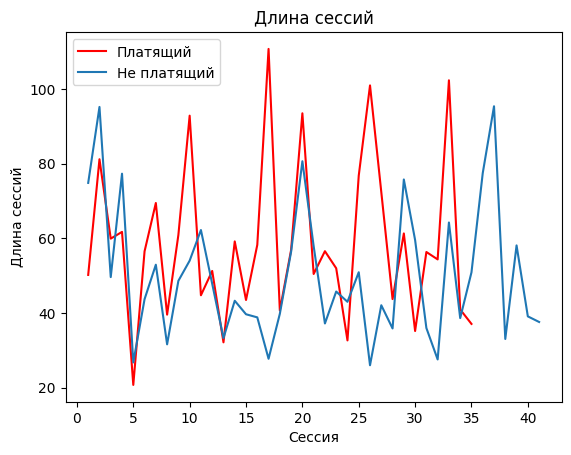

In [ ]:
session_legth_whale.plot(title='Длина сессий',
                             xlabel='Сессия',
                             ylabel='Длина сессий',
                             color = 'red')
session_legth_no_paying.plot(title='Длина сессий',
                             xlabel='Сессия',
                             ylabel='Длина сессий')
plt.legend(['Платящий','Не платящий'])

In [ ]:
session_legth_whale.mean()

58.74904761904762

In [ ]:
session_legth_no_paying.mean()

50.13536585365853

##*Средняя длина сессий для платящего пользователя составляет примерно 58 минут, для не платящего - 50*

##**Время в игре в день**

In [ ]:
time_by_day_whale = whale_df_time.groupby('Day')['Time_minute'].sum()
time_by_day_whale

Day
1     191.233333
2     208.366667
3     193.250000
4     128.116667
5     160.850000
6     110.683333
7     190.983333
8     106.966667
9      84.616667
10    177.683333
11    116.083333
12     96.450000
13    212.933333
14     78.000000
Name: Time_minute, dtype: float64

In [ ]:
time_by_day_whale.mean()

146.87261904761905

In [ ]:
time_by_day_no_paying = no_paying_df_time.groupby('Day')['Time_minute'].sum()
time_by_day_no_paying

Day
1     169.966667
2     153.633333
3     128.200000
4     164.800000
5     124.350000
6     106.200000
7     176.766667
8     140.816667
9     119.883333
10    153.650000
11    123.033333
12    153.700000
13    205.800000
14    134.750000
Name: Time_minute, dtype: float64

In [ ]:
time_by_day_no_paying.mean()

146.82500000000002

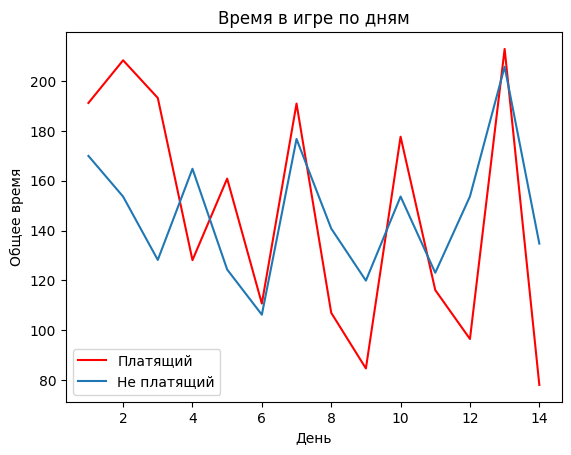

In [ ]:
time_by_day_whale.plot(title='Время в игре по дням',
                             xlabel='День',
                             ylabel='Общее время',
                             color = 'red')
time_by_day_no_paying.plot(title='Время в игре по дням',
                             xlabel='День',
                             ylabel='Общее время')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

 Сперва проверим данные на нормальность. Если распределения нормальны, то будем использовать параметрические тесты, если нет - то прибегнем к непараметрическим тестам. Нормальность распределения проверим с помощью теста Шапиро-Уилка

In [ ]:
stat, p = st.shapiro(time_by_day_whale)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.899, p=0.108
Вероятно нормальное распределение


In [ ]:
stat, p = st.shapiro(time_by_day_no_paying)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.962, p=0.759
Вероятно нормальное распределение


Распределения нормальны, поэтому используем t-test

Прежде чем использовать t-тест, необходимо проверить равенство дисперсий. Сделаем это с помощью F-теста. Используем собстенную функцию.

Н0 - дисперсии выборок одинаковы

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(time_by_day_whale, time_by_day_no_paying)

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика=3.286, p=0.02032
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


Теперь непосредственно запускаем t-test

H0 - выборки не отличаются, статистически значимой разницы между платящим и не платящим нет

In [ ]:
# т.к. дисперсии не равны, то используем критерий Уэлча equal_var = False(для разных дисперсий, True - для одинаковых)
t, p_value = st.ttest_ind(time_by_day_whale, time_by_day_no_paying, equal_var = False)
t, p_value

print('Статистика =', t, 'p =', p_value)

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.003209357977483768 p = 0.9974707253665267
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


##*Вывод: между временем в игре в день для платящего и не платящего пользователя статистически значимой разницы нет*

##**Средняя длина сессии по дням**

In [ ]:
session_mean_legth_by_day_whale = whale_df_time.groupby(['Day','Session'])['Time_minute'].sum()
session_mean_legth_by_day_whale

Day  Session
1    1           50.183333
     2           81.150000
     3           59.900000
2    4           61.700000
     5           20.733333
     6           56.500000
     7           69.433333
3    8           39.550000
     9           60.883333
     10          92.816667
4    11          44.733333
     12          51.250000
     13          32.133333
5    14          59.150000
     15          43.466667
     16          58.233333
6    17         110.683333
7    18          40.666667
     19          56.866667
     20          93.450000
8    21          50.433333
     22          56.533333
9    23          51.966667
     24          32.650000
10   25          76.766667
     26         100.916667
11   27          72.366667
     28          43.716667
12   29          61.283333
     30          35.166667
13   31          56.316667
     32          54.333333
     33         102.283333
14   34          40.933333
     35          37.066667
Name: Time_minute, dtype: float64

In [ ]:
session_mean_legth_by_day_whale = session_mean_legth_by_day_whale.groupby('Day').mean()
session_mean_legth_by_day_whale

Day
1      63.744444
2      52.091667
3      64.416667
4      42.705556
5      53.616667
6     110.683333
7      63.661111
8      53.483333
9      42.308333
10     88.841667
11     58.041667
12     48.225000
13     70.977778
14     39.000000
Name: Time_minute, dtype: float64

In [ ]:
session_mean_legth_by_day_whale.mean()

60.84265873015874

In [ ]:
session_mean_legth_by_day_no_paying = no_paying_df_time.groupby(['Day','Session'])['Time_minute'].sum()
session_mean_legth_by_day_no_paying

Day  Session
1    1          74.816667
     2          95.150000
2    3          49.600000
     4          77.283333
     5          26.750000
3    6          43.683333
     7          52.916667
     8          31.600000
4    9          48.600000
     10         54.000000
     11         62.200000
5    12         47.816667
     13         33.266667
     14         43.266667
6    15         39.650000
     16         38.816667
     17         27.733333
7    18         39.766667
     19         56.383333
     20         80.616667
8    21         57.900000
     22         37.183333
     23         45.733333
9    24         42.983333
     25         50.900000
     26         26.000000
10   27         42.066667
     28         35.850000
     29         75.733333
11   30         59.516667
     31         35.966667
     32         27.550000
12   33         64.216667
     34         38.616667
     35         50.866667
13   36         77.433333
     37         95.333333
     38         33.033333

In [ ]:
session_mean_legth_by_day_no_paying = session_mean_legth_by_day_no_paying.groupby('Day').mean()
session_mean_legth_by_day_no_paying

Day
1     84.983333
2     51.211111
3     42.733333
4     54.933333
5     41.450000
6     35.400000
7     58.922222
8     46.938889
9     39.961111
10    51.216667
11    41.011111
12    51.233333
13    68.600000
14    44.916667
Name: Time_minute, dtype: float64

In [ ]:
session_mean_legth_by_day_no_paying.mean()

50.96507936507936

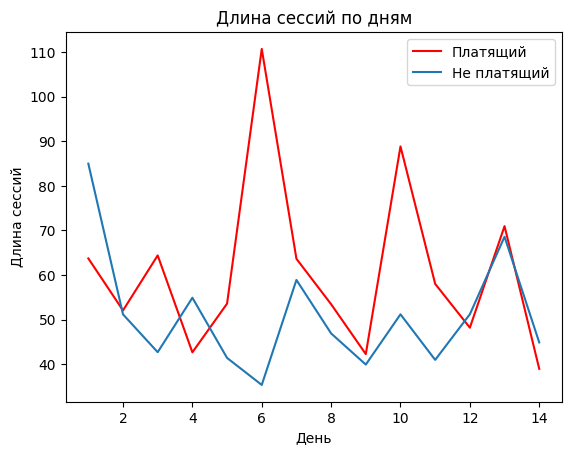

In [ ]:
session_mean_legth_by_day_whale.plot(title='Длина сессий по дням',
                             xlabel='День',
                             ylabel='Длина сессий',
                             color = 'red')
session_mean_legth_by_day_no_paying.plot(title='Длина сессий по дням',
                             xlabel='День',
                             ylabel='Длина сессий')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

In [ ]:
stat, p = st.shapiro(session_mean_legth_by_day_whale)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.869, p=0.040
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(session_mean_legth_by_day_no_paying)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.871, p=0.044
Вероятно не нормальное распределение


Так как распределения не нормальны, мы не можем применить t-test, используем
тест Манна-Уитни

Н0 - выборки не имеют статистически значимых различий

In [ ]:
stat, p = st.mannwhitneyu(session_mean_legth_by_day_whale,session_mean_legth_by_day_no_paying)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 134.00000, p = 0.10286
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


##*Вывод: между средней длиной сессий в день для платящего и не платящего пользователя статистически значимой разницы нет*

#**Количество сессий по дням**

In [ ]:
session_whale = whale_df.groupby('Day')['Session'].nunique()
session_whale

Day
1     3
2     4
3     3
4     3
5     3
6     1
7     3
8     2
9     2
10    2
11    2
12    2
13    3
14    2
Name: Session, dtype: int64

In [ ]:
session_whale.mean()

2.5

In [ ]:
session_no_paying = no_paying_df.groupby('Day')['Session'].nunique()
session_no_paying

Day
1     2
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
Name: Session, dtype: int64

In [ ]:
session_no_paying.mean()

2.9285714285714284

Посмотрим визуально

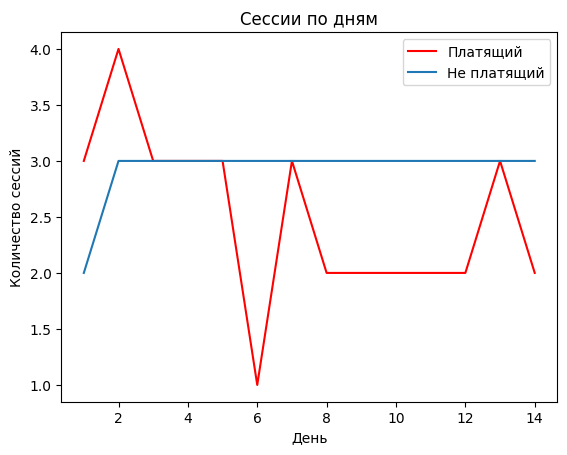

In [ ]:
session_whale.plot(title='Сессии по дням',
                             xlabel='День',
                             ylabel='Количество сессий',
                             color = 'red')
session_no_paying.plot(title='Сессии по дням',
                             xlabel='День',
                             ylabel='Количество сессий')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

In [ ]:
stat, p = st.shapiro(session_whale)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.870, p=0.042
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(session_no_paying)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.297, p=0.000
Вероятно не нормальное распределение


Н0 - выборки не имеют статистически значимых различий

In [ ]:
stat, p = st.mannwhitneyu(session_whale,session_no_paying)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 62.00000, p = 0.04673
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


##*Вывод: исходя из тестов мы видим, что есть статистически значимая разница по количеству сессий в день для платящих и не платящих пользователей. Платящий поводит примерно 2.5 сессии в день, не платящий - 2.9*

#**Общее количество просмотров VIP-пропуска**

In [ ]:
VIP_view_whale_df = whale_df[(whale_df['Tag']=='VIP')]

In [ ]:
VIP_view_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
177,2020-10-27,1,1,1,2,VIP,Start,игрок ознакомился с условиями Випа,1.0,NaN,NaN,0,0,108,1955,32.583333
353,2020-10-27,1,1,2,2,VIP,Start,правила записи,NaN,NaN,NaN,0,0,127,483,8.050000
410,2020-10-27,1,1,2,2,VIP,Start,Нажала на Получить что бы посмотреть что будет,NaN,NaN,NaN,0,0,83,573,9.550000
412,2020-10-27,1,1,2,2,VIP,Pop-Up,Collect daily reward from pet dragon,NaN,NaN,NaN,0,0,83,573,9.550000
413,2020-10-27,1,1,2,2,VIP,Start,NaN,NaN,NaN,NaN,0,0,83,573,9.550000
415,2020-10-27,1,1,2,2,VIP,Reward,NaN,1.0,NaN,30.0,30,0,113,573,9.550000
1569,2020-10-28,2,6,7,5,VIP,Reward,NaN,NaN,NaN,30.0,30,0,730,3390,56.500000
2538,2020-10-29,3,9,10,6,VIP,Reward,NaN,NaN,NaN,30.0,30,0,4840,3579,59.650000
3214,2020-10-30,4,12,11,7,VIP,Reward,NaN,NaN,NaN,30.0,30,0,2772,3075,51.250000
3996,2020-10-31,5,15,12,8,VIP,Reward,NaN,NaN,NaN,30.0,30,0,8836,2608,43.466667


In [ ]:
VIP_view_whale_df['Tag'].count()

19

In [ ]:
VIP_view_no_paying_df = no_paying_df[(no_paying_df['Tag']=='VIP')]

In [ ]:
VIP_view_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
144,2020-10-14,1,1,1.0,2,VIP,Start,NaN,NaN,NaN,NaN,0,0,108,3737,62.283333
146,2020-10-14,1,1,1.0,2,VIP,Start,NaN,NaN,NaN,NaN,0,0,108,3737,62.283333
454,2020-10-14,1,2,2.0,2,VIP,Start,Правила записи,NaN,NaN,NaN,0,0,125,5709,95.150000
904,2020-10-15,2,3,5.0,3,VIP,Start,NaN,NaN,NaN,NaN,0,0,171,2976,49.600000
1131,2020-10-15,2,4,5.0,3,VIP,Start,Правила записи,NaN,NaN,NaN,0,0,62,4637,77.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,2020-10-27,14,40,14.0,8,VIP,Start,Правила записи,NaN,NaN,NaN,0,0,69,2345,39.083333
8302,2020-10-27,14,41,14.0,8,VIP,Start,Правила записи,NaN,NaN,NaN,0,0,69,2255,37.583333
8393,2020-10-27,14,41,14.0,8,VIP,Start,Правила записи,NaN,NaN,NaN,0,0,79,2255,37.583333
8395,2020-10-27,14,41,14.0,8,VIP,Start,вернулась протыкать позиции,NaN,NaN,NaN,0,0,79,2255,37.583333


In [ ]:
VIP_view_no_paying_df['Tag'].count()

70

Посмотрим, зачем они смотрят пропуск

In [ ]:
VIP_view_whale_df_reward = VIP_view_whale_df[VIP_view_whale_df['Action']=='Reward']

In [ ]:
VIP_view_whale_df_reward

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
415,2020-10-27,1,1,2,2,VIP,Reward,NaN,1.0,NaN,30.0,30,0,113,573,9.550000
1569,2020-10-28,2,6,7,5,VIP,Reward,NaN,NaN,NaN,30.0,30,0,730,3390,56.500000
2538,2020-10-29,3,9,10,6,VIP,Reward,NaN,NaN,NaN,30.0,30,0,4840,3579,59.650000
3214,2020-10-30,4,12,11,7,VIP,Reward,NaN,NaN,NaN,30.0,30,0,2772,3075,51.250000
3996,2020-10-31,5,15,12,8,VIP,Reward,NaN,NaN,NaN,30.0,30,0,8836,2608,43.466667
4556,2020-11-01,6,17,13,9,VIP,Reward,NaN,NaN,NaN,30.0,30,0,4941,3729,62.150000
5190,2020-11-02,7,19,14,9,VIP,Reward,NaN,NaN,NaN,30.0,30,0,4307,3412,56.866667
6088,2020-11-03,8,21,15,10,VIP,Reward,NaN,NaN,NaN,30.0,30,0,1012,1475,24.583333
6801,2020-11-04,9,23,16,11,VIP,Reward,NaN,NaN,NaN,30.0,30,0,2919,3118,51.966667
7033,2020-11-05,10,25,16,11,VIP,Reward,NaN,NaN,NaN,30.0,30,0,2650,3618,60.300000


In [ ]:
VIP_view_whale_df_reward['Action'].count()

14

In [ ]:
VIP_view_no_paying_df_reward = VIP_view_no_paying_df[VIP_view_no_paying_df['Action']=='Reward']

In [ ]:
VIP_view_no_paying_df_reward

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute


##*Вывод: не платящий пользователь гораздо чаще смотрел информацию о VIP-пропуске: 70 раз против 19 у платящего, при этом платящий смотрел в основном ради ежедневной награды, не платящий просто смотрел информацию*

##**Количество просмотров VIP-пропуска за сессию**

In [ ]:
VIP_view_by_session_whale_df = VIP_view_whale_df.groupby('Session')['Tag'].count()

In [ ]:
VIP_view_by_session_whale_df

Session
1     6
6     1
9     1
12    1
15    1
17    1
19    1
21    1
23    1
25    1
27    1
29    1
31    1
35    1
Name: Tag, dtype: int64

In [ ]:
VIP_view_by_session_no_paying_df = VIP_view_no_paying_df.groupby('Session')['Tag'].count()

In [ ]:
VIP_view_by_session_no_paying_df

Session
1     2
2     1
3     1
4     4
6     2
7     1
10    2
11    1
12    2
13    1
14    1
15    2
16    2
17    2
18    1
19    2
20    2
21    2
22    2
23    2
24    1
25    2
26    2
27    1
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    3
37    2
38    2
39    2
40    2
41    4
Name: Tag, dtype: int64

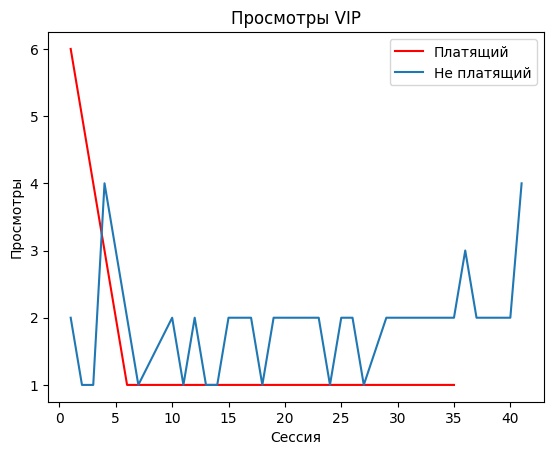

In [ ]:
VIP_view_by_session_whale_df.plot(title='Просмотры VIP',
                             xlabel='Сессия',
                             ylabel='Просмотры',
                             color = 'red')
VIP_view_by_session_no_paying_df.plot(title='Просмотры VIP',
                             xlabel='Сессия',
                             ylabel='Просмотры')
plt.legend(['Платящий','Не платящий'])

##*Вывод: мы видим значительные различия между пользователями. Платящий посмотрел всю информацию о VIP-пропуске в первую сессию, купил его, затем просто забирал ежедневные награды. Не платящий часто смотрел информацию на протяжении каждой сессии,но приобрести не решился*

#**Количество рейдов**

In [ ]:
raid_whale_df = whale_df[(whale_df['Tag']=='Raid')& (whale_df['Action']=='Finish Battle')]

In [ ]:
raid_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
537,2020-10-27,1,2,3,3,Raid,Finish Battle,NaN,1.0,Victory,NaN,0,0,136,1366,22.766667
674,2020-10-27,1,2,4,3,Raid,Finish Battle,легкий противник,NaN,Victory,NaN,0,0,696,3503,58.383333
833,2020-10-27,1,2,5,3,Raid,Finish Battle,легкий противник,NaN,Victory,NaN,0,0,712,3503,58.383333
857,2020-10-27,1,2,5,3,Raid,Finish Battle,сильный противник,NaN,Defeat,NaN,0,0,712,3503,58.383333
861,2020-10-27,1,2,5,3,Raid,Finish Battle,легкий противник,NaN,Victory,NaN,0,0,712,3503,58.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10154,2020-11-09,14,34,19,11,Raid,Finish Battle,NaN,NaN,Victory,NaN,0,0,1414,2456,40.933333
10275,2020-11-09,14,35,19,11,Raid,Finish Battle,NaN,NaN,Victory,NaN,0,0,1458,2224,37.066667
10322,2020-11-09,14,35,19,11,Raid,Finish Battle,Outpost,NaN,Victory,NaN,0,0,1208,2224,37.066667
10356,2020-11-09,14,35,19,11,Raid,Finish Battle,Revenge,NaN,Defeat,NaN,0,0,1208,2224,37.066667


In [ ]:
raid_whale_df['Action'].count()

210

In [ ]:
raid_no_paying_df = no_paying_df[(no_paying_df['Tag']=='Raid')& (no_paying_df['Action']=='Finish Battle')]

In [ ]:
raid_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
186,2020-10-14,1,1,1.0,2,Raid,Finish Battle,NaN,NaN,Defeat,NaN,0,0,110,3737,62.283333
355,2020-10-14,1,1,2.0,2,Raid,Finish Battle,NaN,NaN,Defeat,NaN,0,0,125,3737,62.283333
415,2020-10-14,1,1,2.0,2,Raid,Finish Battle,NaN,NaN,Defeat,NaN,0,0,125,752,12.533333
420,2020-10-14,1,1,2.0,2,Raid,Finish Battle,NaN,NaN,Defeat,NaN,0,0,125,752,12.533333
425,2020-10-14,1,1,2.0,2,Raid,Finish Battle,NaN,NaN,Defeat,NaN,0,0,125,752,12.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8248,2020-10-27,14,40,14.0,8,Raid,Finish Battle,NaN,NaN,Victory,NaN,0,0,66,2345,39.083333
8259,2020-10-27,14,40,14.0,8,Raid,Finish Battle,легкий противник,NaN,Victory,NaN,0,0,69,2345,39.083333
8358,2020-10-27,14,41,14.0,8,Raid,Finish Battle,NaN,NaN,Victory,NaN,0,0,69,2255,37.583333
8362,2020-10-27,14,41,14.0,8,Raid,Finish Battle,"не думала что проиграю, игрок был равен моей силе",NaN,Defeat,NaN,0,0,69,2255,37.583333


In [ ]:
raid_no_paying_df['Action'].count()

175

##*Вывод: платящий игрок чаще вступает в битву с другими игроками: 210 раз против 175 у не платящего*

#**Соотношение побед и поражений в рейдах**

In [ ]:
raid_whale_df['Result'].value_counts(normalize=True).head()

Victory    0.719048
Defeat     0.280952
Name: Result, dtype: float64

In [ ]:
raid_no_paying_df['Result'].value_counts(normalize=True).head()

Victory    0.701149
Defeat     0.298851
Name: Result, dtype: float64

##*Вывод: соотношение побед и поражений в рейдах для разных игроков примерно одинаково: для платящего - 72/28, для не платящего - 70/30*

#**Количество просмотров врат призыва**

In [ ]:
summon_whale_df = whale_df[(whale_df['Tag'] == 'Summon') & (whale_df['Action'] == 'Start')]

In [ ]:
summon_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
52,2020-10-27,1,1,1,1,Summon,Start,NaN,1.0,NaN,NaN,0,0,100,1955,32.583333
61,2020-10-27,1,1,1,1,Summon,Start,NaN,NaN,NaN,NaN,0,0,100,1955,32.583333
168,2020-10-27,1,1,1,2,Summon,Start,Нажала на кнопку GO что бы посмотреть что будет,NaN,NaN,NaN,0,0,103,1955,32.583333
170,2020-10-27,1,1,1,2,Summon,Start,"горела надпись New, зашал посмотреть какие при...",NaN,NaN,NaN,0,0,103,1955,32.583333
241,2020-10-27,1,1,2,2,Summon,Start,NaN,NaN,NaN,NaN,0,0,118,1955,32.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,2020-11-08,13,33,19,11,Summon,Start,NaN,NaN,NaN,NaN,0,0,1426,2782,46.366667
10159,2020-11-09,14,34,19,11,Summon,Start,NaN,NaN,NaN,NaN,0,0,1416,2456,40.933333
10162,2020-11-09,14,34,19,11,Summon,Start,NaN,NaN,NaN,NaN,0,0,1416,2456,40.933333
10191,2020-11-09,14,34,19,11,Summon,Start,NaN,NaN,NaN,NaN,0,0,1418,2456,40.933333


In [ ]:
summon_whale_df['Action'].count()

200

In [ ]:
summon_no_paying_df = no_paying_df[(no_paying_df['Tag'] == 'Summon') & (no_paying_df['Action'] == 'Start')]

In [ ]:
summon_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
44,2020-10-14,1,1,1.0,1,Summon,Start,NaN,NaN,NaN,NaN,0,0,100,3737,62.283333
53,2020-10-14,1,1,1.0,1,Summon,Start,NaN,NaN,NaN,NaN,0,0,100,3737,62.283333
136,2020-10-14,1,1,1.0,2,Summon,Start,Смотрела героев в новом призыве,1,NaN,NaN,0,0,103,3737,62.283333
151,2020-10-14,1,1,1.0,2,Summon,Start,NaN,1(просмотр призыва с войсками из ивента),NaN,NaN,0,0,108,3737,62.283333
235,2020-10-14,1,1,2.0,2,Summon,Start,NaN,NaN,NaN,NaN,0,0,123,3737,62.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,2020-10-27,14,40,14.0,8,Summon,Start,NaN,NaN,NaN,NaN,0,0,54,2345,39.083333
8143,2020-10-27,14,40,14.0,8,Summon,Start,смотрела герое из эпического призыва (хеллоуин...,NaN,NaN,NaN,0,0,54,2345,39.083333
8234,2020-10-27,14,40,14.0,8,Summon,Start,NaN,NaN,NaN,NaN,0,0,61,2345,39.083333
8237,2020-10-27,14,40,14.0,8,Summon,Start,NaN,NaN,NaN,NaN,0,0,61,2345,39.083333


In [ ]:
summon_no_paying_df['Action'].count()

121

##*Вывод: платящий пользователь чаще смотрит врата призыва: 200 раз против 121 у не платящего*

#**Количество просмотров врат призыва по дням**

In [ ]:
summon_whale_by_day_df = summon_whale_df.groupby('Day')['Action'].count()

In [ ]:
summon_whale_by_day_df

Day
1     25
2     15
3     18
4     17
5     28
6      6
7     23
8     15
9      3
10    16
11    10
12     6
13    14
14     4
Name: Action, dtype: int64

In [ ]:
summon_whale_by_day_df.mean()

14.285714285714286

In [ ]:
summon_no_paying_by_day_df = summon_no_paying_df.groupby('Day')['Action'].count()

In [ ]:
summon_no_paying_by_day_df

Day
1     15
2     10
3      8
4      5
5      3
6      3
7      6
8     13
9      8
10    12
11     7
12    17
13     6
14     8
Name: Action, dtype: int64

In [ ]:
summon_no_paying_by_day_df.mean()

8.642857142857142

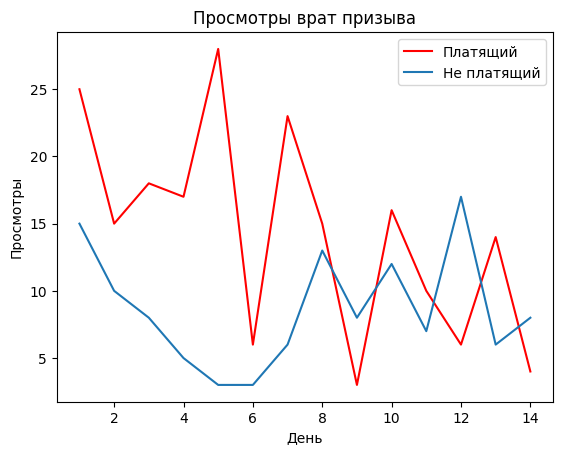

In [ ]:
summon_whale_by_day_df.plot(title='Просмотры врат призыва',
                             xlabel='День',
                             ylabel='Просмотры',
                             color = 'red')
summon_no_paying_by_day_df.plot(title='Просмотры врат призыва',
                             xlabel='День',
                             ylabel='Просмотры')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

In [ ]:
stat, p = st.shapiro(summon_whale_by_day_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.950, p=0.567
Вероятно нормальное распределение


In [ ]:
stat, p = st.shapiro(summon_no_paying_by_day_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.942, p=0.448
Вероятно нормальное распределение


Прежде чем использовать t-тест, необходимо проверить равенство дисперсий. Сделаем это с помощью F-теста. Используем собстенную функцию.

Н0 - дисперсии выборок одинаковы

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(summon_whale_by_day_df,summon_no_paying_by_day_df)

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика=3.342, p=0.01898
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


Теперь непосредственно запускаем t-test

H0 - выборки не отличаются, статистически значимой разницы между платящим и не платящим нет

In [ ]:
# т.к. дисперсии не равны, то используем критерий Уэлча equal_var = False(для разных дисперсий, True - для одинаковых)
t, p_value = st.ttest_ind(summon_whale_by_day_df,summon_no_paying_by_day_df, equal_var = False)
t, p_value

print('Статистика =', t, 'p =', p_value)

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 2.371925690629183 p = 0.027768565283981042
Отклоняем нулевую гипотезу, средние, вероятно, различаются


##*Вывод: между просмотрами врат призыва в разрезе дней для разных пользователей есть статистичеcки значимая разница. В среднем в день платящий смотрит 14 раз, не платящий 8 раз*

#**Общее количество просмотров магазина**

In [ ]:
shop_whale_df = whale_df[(whale_df['Tag'] == 'Shop')]

In [ ]:
shop_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
178,2020-10-27,1,1,1,2,Shop,Start,"ознакомился с текущими паками в магазине, не в...",1.0,NaN,NaN,0,0,108,1955,32.583333
354,2020-10-27,1,1,2,2,Shop,Start,"правила записи, не весь магазин показали",NaN,NaN,NaN,0,0,127,483,8.050000
389,2020-10-27,1,1,2,2,Shop,Start,из окна перенесло в магазин для покупки энергии,NaN,NaN,NaN,0,0,126,573,9.550000
402,2020-10-27,1,1,2,2,Shop,Start,NaN,NaN,NaN,NaN,0,0,126,573,9.550000
420,2020-10-27,1,1,2,2,Shop,Start,"правила записи, показала весь магазин",NaN,NaN,NaN,0,0,113,573,9.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2020-11-09,14,34,19,11,Shop,Start,NaN,NaN,NaN,NaN,0,0,1414,2456,40.933333
10141,2020-11-09,14,34,19,11,Shop,Start,NaN,NaN,NaN,NaN,0,0,1414,2456,40.933333
10201,2020-11-09,14,34,19,11,Shop,Start,Правила записи,NaN,NaN,NaN,0,0,1418,2456,40.933333
10212,2020-11-09,14,35,19,11,Shop,Start,Правила записи,NaN,NaN,NaN,0,0,1448,2224,37.066667


In [ ]:
shop_whale_df['Action'].count()

206

In [ ]:
shop_no_paying_df = no_paying_df[(no_paying_df['Tag'] == 'Shop')]

In [ ]:
shop_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
143,2020-10-14,1,1,1.0,2,Shop,Start,Правила записи,1,NaN,NaN,0,0,108,3737,62.283333
145,2020-10-14,1,1,1.0,2,Shop,Start,NaN,NaN,NaN,NaN,0,0,108,3737,62.283333
147,2020-10-14,1,1,1.0,2,Shop,Start,NaN,NaN,NaN,NaN,0,0,108,3737,62.283333
199,2020-10-14,1,1,1.0,2,Shop,Start,Случайно перешла в магазин через меню аваторов,NaN,NaN,NaN,0,0,110,3737,62.283333
218,2020-10-14,1,1,1.0,2,Shop,Start,NaN,NaN,NaN,NaN,0,0,113,3737,62.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,2020-10-27,14,41,14.0,8,Shop,Start,Правила записи,NaN,NaN,NaN,0,0,69,2255,37.583333
8346,2020-10-27,14,41,14.0,8,Shop,Start,"хочу купить предмет для битвы, свитки воскреше...",NaN,NaN,NaN,0,0,69,2255,37.583333
8375,2020-10-27,14,41,14.0,8,Shop,Start,"хочу купить предмет для битвы, свитки воскреше...",NaN,NaN,NaN,0,0,79,2255,37.583333
8396,2020-10-27,14,41,14.0,8,Shop,Start,протыкала все позиции,NaN,NaN,NaN,0,0,79,2255,37.583333


In [ ]:
shop_no_paying_df['Action'].count()

145

##*Вывод: платящий пользователь чаще заглядывает в магазин: 206 раз против 145 у не платящего*

#**Просмотры магазина по дням**

In [ ]:
shop_whale_by_day_df = shop_whale_df.groupby('Day')['Tag'].count()

In [ ]:
shop_whale_by_day_df

Day
1     25
2     23
3     25
4     12
5     19
6      5
7     26
8      8
9      8
10    12
11    17
12     5
13    15
14     6
Name: Tag, dtype: int64

In [ ]:
shop_whale_by_day_df.mean()

14.714285714285714

In [ ]:
shop_no_paying_by_day_df = shop_no_paying_df.groupby('Day')['Tag'].count()

In [ ]:
shop_no_paying_by_day_df

Day
1     14
2      8
3     11
4     10
5      6
6      6
7     10
8     12
9     11
10    11
11    16
12     9
13    12
14     9
Name: Tag, dtype: int64

In [ ]:
shop_no_paying_by_day_df.mean()

10.357142857142858

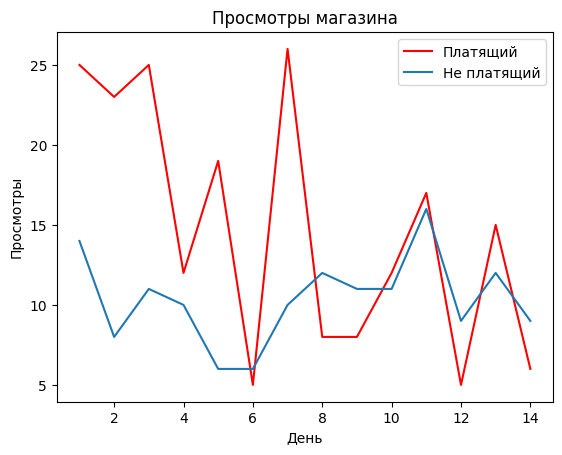

In [ ]:
shop_whale_by_day_df.plot(title='Просмотры магазина',
                             xlabel='День',
                             ylabel='Просмотры',
                             color = 'red')
shop_no_paying_by_day_df.plot(title='Просмотры магазина',
                             xlabel='День',
                             ylabel='Просмотры')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

In [ ]:
stat, p = st.shapiro(shop_whale_by_day_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.899, p=0.111
Вероятно нормальное распределение


In [ ]:
stat, p = st.shapiro(shop_no_paying_by_day_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.963, p=0.773
Вероятно нормальное распределение


Прежде чем использовать t-тест, необходимо проверить равенство дисперсий. Сделаем это с помощью F-теста. Используем собстенную функцию.

Н0 - дисперсии выборок одинаковы

In [ ]:
stat, p = f_test(shop_whale_by_day_df, shop_no_paying_by_day_df)

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика=8.072, p=0.00031
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


Теперь непосредственно запускаем t-test

H0 - выборки не отличаются, статистически значимой разницы между платящим и не платящим нет

In [ ]:
# т.к. дисперсии не равны, то используем критерий Уэлча equal_var = False(для разных дисперсий, True - для одинаковых)
t, p_value = st.ttest_ind(shop_whale_by_day_df, shop_no_paying_by_day_df, equal_var = False)
t, p_value

print('Статистика =', t, 'p =', p_value)

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 1.9592912789295085 p = 0.06754900618608235
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


##*Вывод: хотя мы установили, что платящий заглядывает в магазин чаще - в среднем 14 раз в день (против 10 у не платящего), мы не можем утверждать, что разница статистически значима*

#**Количество просмотров рекламы**

In [ ]:
mystic_whale_df = whale_df[(whale_df['Tag'] == 'Mystic Vision') & (whale_df['Action'] == 'Finish')]

In [ ]:
mystic_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
203,2020-10-27,1,1,1,2,Mystic Vision,Finish,игрок не смотрел рекламу,NaN,NaN,NaN,0,0,108,1955,32.583333
346,2020-10-27,1,1,2,2,Mystic Vision,Finish,дали 2* предмет для битвы,1.0,NaN,1.0,1,0,127,483,8.050000
1285,2020-10-28,2,4,7,4,Mystic Vision,Finish,предмет для битвы 2*,NaN,NaN,1.0,1,0,884,3702,61.700000
2223,2020-10-28,2,7,9,5,Mystic Vision,Finish,предмет для битвы 2*,NaN,NaN,1.0,1,0,4962,334,5.566667
2356,2020-10-29,3,8,9,6,Mystic Vision,Finish,выпал токен дейли,NaN,NaN,3.0,3,0,4973,2373,39.550000
3111,2020-10-30,4,11,11,7,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,2840,2684,44.733333
3600,2020-10-30,4,13,12,7,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,2916,1928,32.133333
3751,2020-10-31,5,14,12,8,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,2525,3336,55.600000
5321,2020-11-02,7,19,14,10,Mystic Vision,Finish,NaN,NaN,NaN,1.0,1,0,4110,3412,56.866667
6605,2020-11-03,8,22,16,11,Mystic Vision,Finish,NaN,NaN,NaN,1.0,1,0,2945,3392,56.533333


In [ ]:
mystic_whale_df['Action'].count()

11

In [ ]:
mystic_no_paying_df = no_paying_df[(no_paying_df['Tag'] == 'Mystic Vision') & (no_paying_df['Action'] == 'Finish')]

In [ ]:
mystic_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
174,2020-10-14,1,1,1.0,2,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,110,3737,62.283333
927,2020-10-15,2,3,5.0,3,Mystic Vision,Finish,NaN,NaN,NaN,1.0,1,0,172,2976,49.600000
1649,2020-10-16,3,6,6.0,4,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,97,2621,43.683333
2728,2020-10-17,4,11,8.0,4,Mystic Vision,Finish,NaN,NaN,NaN,2.0,2,0,114,3732,62.200000
2785,2020-10-18,5,12,8.0,4,Mystic Vision,Finish,NaN,NaN,NaN,3.0,3,0,118,2828,47.133333
3242,2020-10-18,5,14,8.0,5,Mystic Vision,Finish,NaN,NaN,NaN,3.0,3,0,135,2596,43.266667
3329,2020-10-19,6,15,8.0,5,Mystic Vision,Finish,рано закрыла и не увидела все награды,NaN,NaN,2.0,2,0,141,2379,39.650000
3808,2020-10-20,7,18,9.0,5,Mystic Vision,Finish,Дали Emblems x3,NaN,NaN,1.0,1,0,168,2386,39.766667
4394,2020-10-21,8,21,10.0,5,Mystic Vision,Finish,NaN,NaN,NaN,1.0,1,0,204,3474,57.900000
5338,2020-10-23,10,27,11.0,6,Mystic Vision,Finish,NaN,NaN,NaN,1.0,1,0,227,2524,42.066667


In [ ]:
mystic_no_paying_df['Action'].count()

16

##*Вывод: не платящий игрок чаще смотрит рекламу - 16 раз против 11 у платящего*

#**Просмотр рекламы по дням**

In [ ]:
mystic_by_day_whale_df = mystic_whale_df.groupby('Day')['Tag'].count()

In [ ]:
mystic_by_day_whale_df

Day
1     2
2     2
3     1
4     2
5     1
7     1
8     1
11    1
Name: Tag, dtype: int64

In [ ]:
mystic_by_day_no_paying_df = mystic_no_paying_df.groupby('Day')['Tag'].count()

In [ ]:
mystic_by_day_no_paying_df

Day
1     1
2     1
3     1
4     1
5     2
6     1
7     1
8     1
10    1
11    1
12    2
13    2
14    1
Name: Tag, dtype: int64

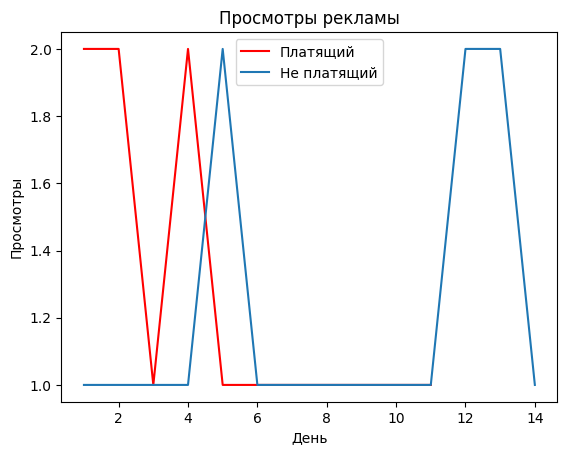

In [ ]:
mystic_by_day_whale_df.plot(title='Просмотры рекламы',
                             xlabel='День',
                             ylabel='Просмотры',
                             color = 'red')
mystic_by_day_no_paying_df.plot(title='Просмотры рекламы',
                             xlabel='День',
                             ylabel='Просмотры')
plt.legend(['Платящий','Не платящий'])

##Проверим на статистическую значимость

In [ ]:
stat, p = st.shapiro(mystic_by_day_whale_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.641, p=0.000
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(mystic_by_day_no_paying_df)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.533, p=0.000
Вероятно не нормальное распределение


Н0 - выборки не отличаются

In [ ]:
stat, p = st.mannwhitneyu(mystic_by_day_whale_df, mystic_by_day_no_paying_df)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 59.50000, p = 0.51753
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


##*Вывод: судя по статистическому тесту, мы не можем утверждать, что пользователи по-разному смотрят рекламу*

#**Количество просмотров баттл пасса**

In [ ]:
battlepass_whale_df = whale_df[(whale_df['Tag'] == 'Path of Valor') & (whale_df['Action'] == 'Start')]

In [ ]:
battlepass_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
3297,2020-10-30,4,12,12,7,Path of Valor,Start,первое открытие,1.0,NaN,NaN,0,0,1282,3075,51.250000
3299,2020-10-30,4,12,12,7,Path of Valor,Start,продолжила смотреть награды,NaN,NaN,NaN,0,0,1282,3075,51.250000
3303,2020-10-30,4,12,12,7,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1582,3075,51.250000
3305,2020-10-30,4,12,12,7,Path of Valor,Start,светился восклицательный знак,NaN,NaN,NaN,0,0,1582,3075,51.250000
3317,2020-10-30,4,12,12,7,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1582,3075,51.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,2020-11-09,14,34,19,11,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1426,2456,40.933333
10085,2020-11-09,14,34,19,11,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1426,2456,40.933333
10195,2020-11-09,14,34,19,11,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1418,2456,40.933333
10253,2020-11-09,14,35,19,11,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,1458,2224,37.066667


In [ ]:
battlepass_whale_df['Action'].count()

125

In [ ]:
battlepass_no_paying_df = no_paying_df[(no_paying_df['Tag'] == 'Path of Valor') & (no_paying_df['Action'] == 'Start')]

In [ ]:
battlepass_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
5659,2020-10-23,10,29,12.0,6,Path of Valor,Start,NaN,1,NaN,NaN,0,0,267,4544,75.733333
5662,2020-10-23,10,29,12.0,6,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,267,4544,75.733333
5697,2020-10-23,10,29,12.0,6,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,267,4544,75.733333
5712,2020-10-23,10,29,12.0,6,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,267,4544,75.733333
5716,2020-10-23,10,29,12.0,6,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,267,4544,75.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,2020-10-27,14,40,14.0,8,Path of Valor,Start,выполнила одно задание ежедневное,NaN,NaN,NaN,0,0,61,2345,39.083333
8267,2020-10-27,14,40,14.0,8,Path of Valor,Start,NaN,NaN,NaN,NaN,0,0,69,2345,39.083333
8333,2020-10-27,14,41,14.0,8,Path of Valor,Start,"почти подняла уровень в сезоннике, нечего выпо...",NaN,NaN,NaN,0,0,69,2255,37.583333
8385,2020-10-27,14,41,14.0,8,Path of Valor,Start,листала награды баттл пасса,NaN,NaN,NaN,0,0,79,2255,37.583333


In [ ]:
battlepass_no_paying_df['Action'].count()

88

##*Вывод: платящий смотрел боевой пропуск чаще - 125 раз, не платящий - 88 раз*

#**Просмотры баттл пасса за сессию**

In [ ]:
battlepass_by_session_whale_df = battlepass_whale_df.groupby('Session')['Tag'].count()

In [ ]:
battlepass_by_session_whale_df

Session
12     6
13     8
14    14
15     3
16     1
17    10
18     6
19     3
20     4
21     7
22     3
23     7
24     3
25     7
26     2
27    11
28     1
29     5
30     2
31     7
32     1
33     2
34    10
35     2
Name: Tag, dtype: int64

In [ ]:
battlepass_by_session_whale_df.mean()

5.208333333333333

In [ ]:
battlepass_by_session_whale_df.count()

24

In [ ]:
battlepass_by_session_no_paying_df = battlepass_no_paying_df.groupby('Session')['Tag'].count()

In [ ]:
battlepass_by_session_no_paying_df

Session
29    17
30    12
31    10
32     3
33     8
34     4
35     2
36     6
37    12
38     2
39     4
40     5
41     3
Name: Tag, dtype: int64

In [ ]:
battlepass_by_session_no_paying_df.mean()

6.769230769230769

In [ ]:
battlepass_by_session_no_paying_df.count()

13

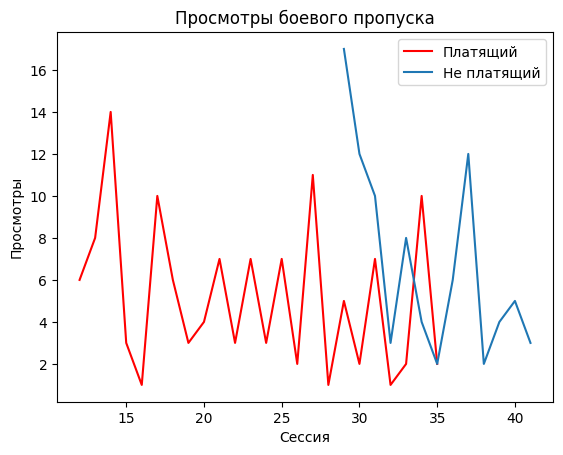

In [ ]:
battlepass_by_session_whale_df.plot(title='Просмотры боевого пропуска',
                             xlabel='Сессия',
                             ylabel='Просмотры',
                             color = 'red')
battlepass_by_session_no_paying_df.plot(title='Просмотры боевого пропуска',
                             xlabel='Сессия',
                             ylabel='Просмотры')
plt.legend(['Платящий','Не платящий'])

##*Вывод: проведя анализ просмотра боевого пропуска за сессию мы можем увидеть значительные различия между платящим и не платящим пользователями.*

##*Платящий смотрел пропуск в 24 сессиях (5,2 просмотра за сессию в среднем)*

##*Не платящий смотрел пропуск в 13 сессиях (6,7 просмотра за сессию в среднем)*

##*При этом платящий начал смотреть значительно раньше - на своей 12 сессии, в то время как не платящий только на 29*

#**Количество показов офферов (предложений и акций)**

In [ ]:
offer_whale_df = whale_df[whale_df['Tag'] == 'Offers']

In [ ]:
offer_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
166,2020-10-27,1,1,1,2,Offers,Halloween Offers Day 2 $9.99,Pop-Up по окончанию обучения,1.0,NaN,NaN,0,0,103,1955,32.583333
182,2020-10-27,1,1,1,2,Offers,Halloween Offers Day 2 $9.99,сама открыла,NaN,NaN,NaN,0,0,108,1955,32.583333
474,2020-10-27,1,2,2,3,Offers,Halloween Offers Day 2 $9.99,правила записи,NaN,NaN,NaN,0,0,123,1366,22.766667
499,2020-10-27,1,2,3,3,Offers,Super Starter Pack $4.99,Pop-Up после поднятия уровня,1.0,NaN,NaN,0,0,136,1366,22.766667
553,2020-10-27,1,2,3,3,Offers,Super Starter Pack $4.99,сама открыла,NaN,NaN,NaN,0,0,136,1366,22.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876,2020-11-08,13,33,19,11,Offers,"Cat's Contraptions, 1/2 $4.99",NaN,NaN,NaN,NaN,0,0,424,2782,46.366667
9877,2020-11-08,13,33,19,11,Offers,"Cat's Contraptions, 2/2 $19.99",была доступно к покупке 1 раз,NaN,NaN,NaN,0,0,424,2782,46.366667
9880,2020-11-08,13,33,19,11,Offers,"Cat's Contraptions, 1/2 $4.99",доступно к покупке 1 раз,NaN,NaN,NaN,0,0,924,2782,46.366667
9881,2020-11-08,13,33,19,11,Offers,"Cat's Contraptions, 2/2 $19.99",была доступно к покупке 1 раз,NaN,NaN,NaN,0,0,924,2782,46.366667


In [ ]:
offer_whale_df['Action'].count()

234

In [ ]:
offer_no_paying_df = no_paying_df[no_paying_df['Tag'] == 'Offers']

In [ ]:
offer_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
133,2020-10-14,1,1,1.0,2,Offers,Ninja Offers Part 1/5 $2.99,Появление в игре нового ивента и призыва с нов...,1,NaN,NaN,0,0,103,3737,62.283333
134,2020-10-14,1,1,1.0,2,Offers,Ninja Offers Part 1/5 50 Gems,Появление в игре нового ивента и призыва с нов...,NaN,NaN,NaN,0,0,103,3737,62.283333
149,2020-10-14,1,1,1.0,2,Offers,Ninja Offers Part 1/5 $2.99,сама открыла,NaN,NaN,NaN,0,0,108,3737,62.283333
150,2020-10-14,1,1,1.0,2,Offers,Ninja Offers Part 1/5 50 Gems,сама открыла,NaN,NaN,NaN,0,0,108,3737,62.283333
374,2020-10-14,1,1,2.0,2,Offers,Ninja Offers Part 1/5 $2.99,Правила записи,NaN,NaN,NaN,0,0,125,3737,62.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,2020-10-27,14,41,14.0,8,Offers,Heavently Treasures $2.99,Правила записи,NaN,NaN,NaN,0,0,79,2255,37.583333
8400,2020-10-27,14,41,14.0,8,Offers,Halloween Offers Day 2 $9.99,Правила записи,NaN,NaN,NaN,0,0,79,2255,37.583333
8427,2020-10-27,14,41,14.0,8,Offers,Halloween Offers Day 2 $9.99,Правила записи,NaN,NaN,NaN,0,0,79,2255,37.583333
8444,2020-10-27,14,41,14.0,8,Offers,Heavently Treasures $2.99,Pop-Up,NaN,NaN,NaN,0,0,79,2255,37.583333


In [ ]:
offer_no_paying_df['Action'].count()

316

##*Вывод: не платящему чаще показывались акции и спецпредложения - 316 раз, платящему - 234 раза*

#**Показы офферов за сессию**

In [ ]:
offer_by_session_wahle_df = offer_whale_df.groupby('Session')['Tag'].count()

In [ ]:
offer_by_session_wahle_df

Session
1      2
2      9
3      7
4      3
5      1
6      2
7      2
8      2
9      1
10    11
11     6
12     6
13     5
14    10
15     6
16    22
17     5
18     4
19     5
20     6
21     5
22     9
23     3
24     2
25    21
26    12
27     3
28     7
29     8
30    10
31    11
32    17
33    11
Name: Tag, dtype: int64

In [ ]:
offer_by_session_wahle_df.mean()

7.090909090909091

In [ ]:
offer_by_session_no_paying_df = offer_no_paying_df.groupby('Session')['Tag'].count()

In [ ]:
offer_by_session_no_paying_df

Session
1     10
2     11
3     11
4     13
5      6
6      6
7     11
8      4
9     10
10    18
11     6
12    12
13    23
14    20
15    20
19     2
20     4
21     7
22     5
23     3
24     4
25     4
26     4
27     2
28     4
29     2
30     4
31     7
32     8
33     8
34     8
35    12
36    10
37     6
38     4
39     9
40     8
41    10
Name: Tag, dtype: int64

In [ ]:
offer_by_session_no_paying_df.mean()

8.31578947368421

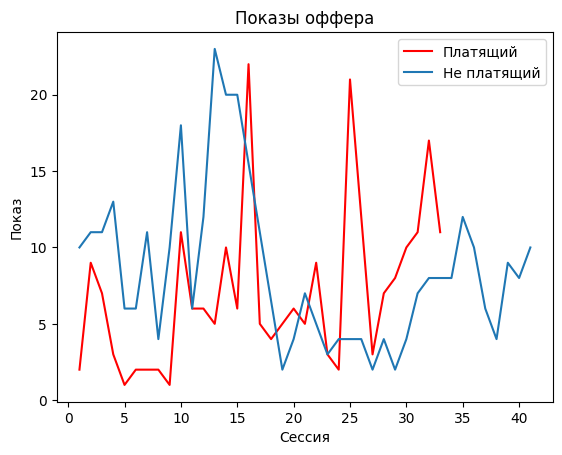

In [ ]:
offer_by_session_wahle_df.plot(title='Показы оффера',
                             xlabel='Сессия',
                             ylabel='Показ',
                             color = 'red')
offer_by_session_no_paying_df.plot(title='Показы оффера',
                             xlabel='Сессия',
                             ylabel='Показ')
plt.legend(['Платящий','Не платящий'])

##*Вывод: не платящему пользователю акции показываются чаще - 8.3 раза за сессию, платящему - 7 раз за сессию*

##**Как часто игроки смотрят информацию об ивентах?**

In [ ]:
event_whale_df = whale_df[(whale_df['Tag'] == 'Event') & (whale_df['Action'] == 'Start')]

In [ ]:
event_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
2534,2020-10-29,3,9,10,6,Event,Start,NaN,1.0,NaN,NaN,0,0,4810,3579,59.650000
2536,2020-10-29,3,9,10,6,Event,Start,"забрать награду за $1,99",NaN,NaN,NaN,0,0,4810,3579,59.650000
2841,2020-10-29,3,10,11,6,Event,Start,передумала начинать бой,NaN,NaN,NaN,0,0,2126,3833,63.883333
2867,2020-10-29,3,10,11,6,Event,Start,"обидно что оборвался уровень, зря потратили ре...",NaN,NaN,NaN,0,0,851,1736,28.933333
2896,2020-10-29,3,10,11,6,Event,Start,открытие стоит $1.99,NaN,NaN,NaN,0,0,451,1736,28.933333
3118,2020-10-30,4,11,11,7,Event,Start,не хватает энергии,NaN,NaN,NaN,0,0,2840,2684,44.733333
4020,2020-10-31,5,15,12,8,Event,Start,NaN,NaN,NaN,NaN,0,0,8836,2608,43.466667
4725,2020-11-01,6,17,14,9,Event,Start,NaN,NaN,NaN,NaN,0,0,4958,3729,62.150000
4727,2020-11-01,6,17,14,9,Event,Start,NaN,NaN,NaN,NaN,0,0,4958,3729,62.150000
5591,2020-11-02,7,19,14,10,Event,Start,NaN,NaN,NaN,NaN,0,0,1136,3412,56.866667


In [ ]:
event_whale_df['Action'].count()

19

In [ ]:
event_no_paying_df = no_paying_df[(no_paying_df['Tag'] == 'Event') & (no_paying_df['Action'] == 'Start')]

In [ ]:
event_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
4362,2020-10-21,8,21,10.0,5,Event,Start,NaN,NaN,NaN,NaN,0,0,203,3474,57.900000
4364,2020-10-21,8,21,10.0,5,Event,Start,читаю вопросительные знаки,NaN,NaN,NaN,0,0,203,3474,57.900000
4564,2020-10-21,8,22,10.0,5,Event,Start,NaN,NaN,NaN,NaN,0,0,204,2201,36.683333
4997,2020-10-22,9,24,11.0,5,Event,Start,NaN,NaN,NaN,NaN,0,0,223,2579,42.983333
5301,2020-10-22,9,26,11.0,5,Event,Start,NaN,NaN,NaN,NaN,0,0,225,1560,26.000000
5358,2020-10-23,10,27,11.0,6,Event,Start,NaN,NaN,NaN,NaN,0,0,227,2524,42.066667
5382,2020-10-23,10,27,11.0,6,Event,Start,NaN,NaN,NaN,NaN,0,0,257,2524,42.066667
5386,2020-10-23,10,27,11.0,6,Event,Start,NaN,NaN,NaN,NaN,0,0,257,2524,42.066667
5467,2020-10-23,10,27,11.0,6,Event,Start,NaN,NaN,NaN,NaN,0,0,257,2524,42.066667
5896,2020-10-24,11,30,12.0,6,Event,Start,NaN,NaN,NaN,NaN,0,0,269,3571,59.516667


In [ ]:
event_no_paying_df['Action'].count()

17

##*Вывод: платящий смотрел информацию об ивенте 19 раз, не платящий - 17*

##**Как часто игроки проходят ивенты?**

In [ ]:
event_battle_whale_df = whale_df[(whale_df['Tag'] == 'Event') & (whale_df['Action'] == 'Finish Battle')]

In [ ]:
event_battle_whale_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New Experience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
2466,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,1.0,Victory,NaN,0,0,4983,3579,59.650000
2510,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,4808,3579,59.650000
2514,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,4808,3579,59.650000
2520,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,4810,3579,59.650000
2523,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,4810,3579,59.650000
2526,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,4810,3579,59.650000
2529,2020-10-29,3,9,10,6,Event,Finish Battle,сложный босс - герой из призыва тематического,1.0,Victory,NaN,0,0,4810,3579,59.650000
2688,2020-10-29,3,10,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,2851,3833,63.883333
2691,2020-10-29,3,10,10,6,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,2851,3833,63.883333
2694,2020-10-29,3,10,10,6,Event,Finish Battle,аватар дали за пройденный уровень,NaN,Victory,NaN,0,0,2851,3833,63.883333


In [ ]:
event_battle_whale_df['Action'].count()

42

In [ ]:
event_battle_no_paying_df = no_paying_df[(no_paying_df ['Tag'] == 'Event') & (no_paying_df ['Action'] == 'Finish Battle')]

In [ ]:
event_battle_no_paying_df

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,New expirience,Result,Gems,Gems+,Gems-,Gems Balance,Videolength_seconds,Videolength_minute
4220,2020-10-20,7,20,10.0,5,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,197,4837,80.616667
4224,2020-10-20,7,20,10.0,5,Event,Finish Battle,NaN,NaN,Defeat,NaN,0,0,197,4837,80.616667
4447,2020-10-21,8,21,10.0,5,Event,Finish Battle,NaN,NaN,Defeat,NaN,0,0,204,3474,57.900000
7268,2020-10-26,13,36,13.0,7,Event,Finish Battle,нравится музыка ивента,NaN,Victory,NaN,0,0,28,4646,77.433333
7272,2020-10-26,13,36,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,28,4646,77.433333
7275,2020-10-26,13,36,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,28,4646,77.433333
7278,2020-10-26,13,36,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,28,4646,77.433333
7283,2020-10-26,13,36,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,30,4646,77.433333
7286,2020-10-26,13,36,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,30,4646,77.433333
7452,2020-10-26,13,37,13.0,7,Event,Finish Battle,NaN,NaN,Victory,NaN,0,0,30,5720,95.333333


In [ ]:
event_battle_no_paying_df['Action'].count()

31

##*Вывод: платящий игрок чаще вступает в битвы в рамках ивентов - 42 раза против 31 у не платящего*

#**3. Итоговые выводы**

##**Проведя количественный анализ игры, мы можем сформулировать основные отличия в поведении платящих и не платящих пользователей:**

##*Платящий игрок проводит в игре меньше сессий - 35 против 41 у не платящего, но длина его сесиии больше (58 минут против 50 у не платящего)*

##*Платящий игрок проводит в среднем 2.5 сессии в день, не платящий - 2.9*

##*Платящий посмотрел всю информацию о VIP-пропуске в первую сессию, купил его, затем просто забирал ежедневные награды (всего посмотрел 19 раз). Не платящий часто смотрел информацию на протяжении каждой сессии,но приобрести не решился (посмотрел 70 раз)*

##*Платящий игрок чаще вступает в битву с другими игроками: 210 раз против 175 у не платящего*

##*Платящий пользователь чаще смотрит врата призыва: 200 раз (в среднем 14 раз в день) против 121 у не платящего (8 раз в день)*

##*Платящий пользователь чаще заглядывает в магазин: 206 раз (в среднем 14 раз в день) против 145 у не платящего (10 раз в день)*

##*Не платящий игрок чаще смотрит рекламу - 16 раз против 11 у платящего*

##*Платящий смотрел боевой пропуск чаще - 125 раз, не платящий - 88 раз. Платящий смотрел пропуск в 24 сессиях (5,2 просмотра за сессию в среднем). Не платящий смотрел пропуск в 13 сессиях (6,7 просмотра за сессию в среднем). При этом платящий начал смотреть значительно раньше - на своей 12 сессии, в то время как не платящий только на 29*

##*Не платящему чаще показывались акции и спецпредложения - 316 раз (8.3 раза за сессию), платящему - 234 раза (7 раз за сессию)*

##*Платящий игрок чаще вступает в битвы в рамках ивентов - 42 раза против 31 у не платящего*